In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
import numpy as np
import tensorly as tl
tensor = tl.tensor([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.],
                        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [4]:
print(tensor.shape)

(12, 12)


In [43]:
df = pd.read_csv('cleaned_data_numerical.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   AGE                         26664 non-null  int64 
 3   BILL_AMT1                   26664 non-null  int64 
 4   BILL_AMT2                   26664 non-null  int64 
 5   BILL_AMT3                   26664 non-null  int64 
 6   BILL_AMT4                   26664 non-null  int64 
 7   BILL_AMT5                   26664 non-null  int64 
 8   BILL_AMT6                   26664 non-null  int64 
 9   PAY_AMT1                    26664 non-null  int64 
 10  PAY_AMT2                    26664 non-null  int64 
 11  PAY_AMT3                    26664 non-null  int64 
 12  PAY_AMT4                    26664 non-null  int64 
 13  PAY_AMT5                    26664 non-null  in

In [44]:
Non_features = ['ID','default payment next month']
X = df.drop(columns=Non_features).values
Y = df.iloc[:,15].values

In [56]:
scale = StandardScaler()

X_scale = scale.fit_transform(X)
Y_scale = Y.ravel()

print(X_scale.shape,Y_scale.shape)

(26664, 14) (26664,)


In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
X_pca = pca.fit_transform(X_scale)
print(X_pca.shape)

(26664, 2)


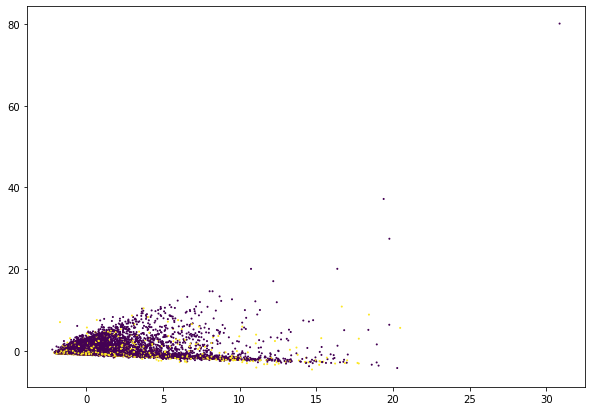

In [59]:
plt.figure(figsize=(10,7))
plt.scatter(X_pca[:,0],X_pca[:,1],c = df['default payment next month'],s=1)
plt.show()

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y_scale, test_size=0.2, random_state=42)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
def update_weights_sgd(X_train, y_train, weights, learning_rate):
    for X_each, y_each in zip(X_train, y_train):
        prediction = compute_prediction(X_each, weights)
        weights_delta = X_each.T * (y_each - prediction)
        weights += learning_rate * weights_delta
    return weights

def train_logistic_regression_sgd(X_train, y_train, max_iter, learning_rate, fit_intercept=False):
    if fit_intercept:
        intercept = np.ones((X_train.shape[0], 1))
        X_train = np.hstack((intercept, X_train))
    weights = np.zeros(X_train.shape[1])+0.5
    for iteration in range(max_iter):
        weights = update_weights_sgd(X_train, y_train, weights, learning_rate)
        # Check the cost for every 2 (for example) iterations
        if iteration % 2 == 0:
            print(compute_cost(X_train, y_train, weights))
    return weights

def sigmoid(input):
    return 1.0 / (1 + np.exp(-input))

def compute_prediction(X, weights):
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    return predictions

def compute_cost(X, y, weights):
    predictions = compute_prediction(X, weights)
    cost = np.mean(-y * np.log(predictions) - (1 - y) * np.log(1 - predictions))
    return cost

def predict(X, weights):
    if X.shape[1] == weights.shape[0] - 1:
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
    return compute_prediction(X, weights)

def classification(threshold_P, X, weights):
    vec = predict(X, weights)
    vec = np.where(vec > threshold_P, 1, 0)
    return vec

In [28]:
weights = train_logistic_regression_sgd(X_train, Y_train, 20, 0.001, fit_intercept=True)

0.5124924251455221
0.5105342595525385
0.5102863959302736
0.5101745591659188
0.5101008217217425
0.5100465068213142
0.5100047646131735
0.5099718685007273
0.509945464487504
0.5099239683396801


In [33]:
predictions = classification(0.4,X_test,weights)
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[4171   12]
 [1141    9]]
0.7837989874367148


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [37]:
clf = RandomForestClassifier(class_weight = 'balanced',n_estimators=100)

parameters = {"max_depth": [10, None],
              "max_features": ['auto', 'sqrt', 'log2', 3, 10],
              "min_samples_split": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [38]:
RF_clf = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)
RF_clf = RF_clf.fit(X_train, Y_train)
print('The best model:\n', RF_clf.best_params_)

C:\Users\Henry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Henry\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Henry\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Henry\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Henry\anaconda3\lib\site-package

The best model:
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}


In [39]:
clf_best = RF_clf.best_estimator_
accuracy = clf_best.score(X_test, Y_test)
print(accuracy)

0.7864241515094693


In [61]:
from sklearn.svm import SVC

clf_0 = SVC(class_weight='balanced', random_state=42)

parameters = {'C': [0.1, 1, 10],
    'gamma': [1e-07, 1e-08, 1e-06],
    'kernel' : ['rbf', 'linear'] }


grid_search = GridSearchCV(clf_0, parameters, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)
print('The best model:\n', grid_search.best_params_)

The best model:
 {'C': 1, 'gamma': 1e-07, 'kernel': 'rbf'}


In [62]:
clf_best = grid_search.best_estimator_
accuracy = clf_best.score(X_test, Y_test)
print(accuracy)

0.2156384774048378


In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(4, input_dim = len(X_train[0, :]), activation = 'relu'))
model.add(Dense(3, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 60        
_________________________________________________________________
dense_13 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 4         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [55]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'binary_crossentropy',optimizer = opt, metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data =(X_test, Y_test), epochs = 30, batch_size = 5)

Epoch 1/30
4267/4267 [==============================] - 4s 893us/step - loss: 0.5970 - accuracy: 0.7092 - val_loss: 0.5374 - val_accuracy: 0.7815
Epoch 2/30
4267/4267 [==============================] - 3s 783us/step - loss: 0.5369 - accuracy: 0.7758 - val_loss: 0.5193 - val_accuracy: 0.7844
Epoch 3/30
4267/4267 [==============================] - 3s 783us/step - loss: 0.5255 - accuracy: 0.7767 - val_loss: 0.5124 - val_accuracy: 0.7844
Epoch 4/30
4267/4267 [==============================] - 3s 786us/step - loss: 0.5202 - accuracy: 0.7767 - val_loss: 0.5080 - val_accuracy: 0.7844
Epoch 5/30
4267/4267 [==============================] - 3s 770us/step - loss: 0.5169 - accuracy: 0.7766 - val_loss: 0.5052 - val_accuracy: 0.7844
Epoch 6/30
2968/4267 [===================>..........] - ETA: 0s - loss: 0.5175 - accuracy: 0.7749

KeyboardInterrupt: 